In [2]:
var openDigger = require('../src/open_digger');
var labelData = openDigger.label.getLabelData(15345331);
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021];
var repo_id = 15345331
var query = openDigger.driver.clickhouse.query;

任务1


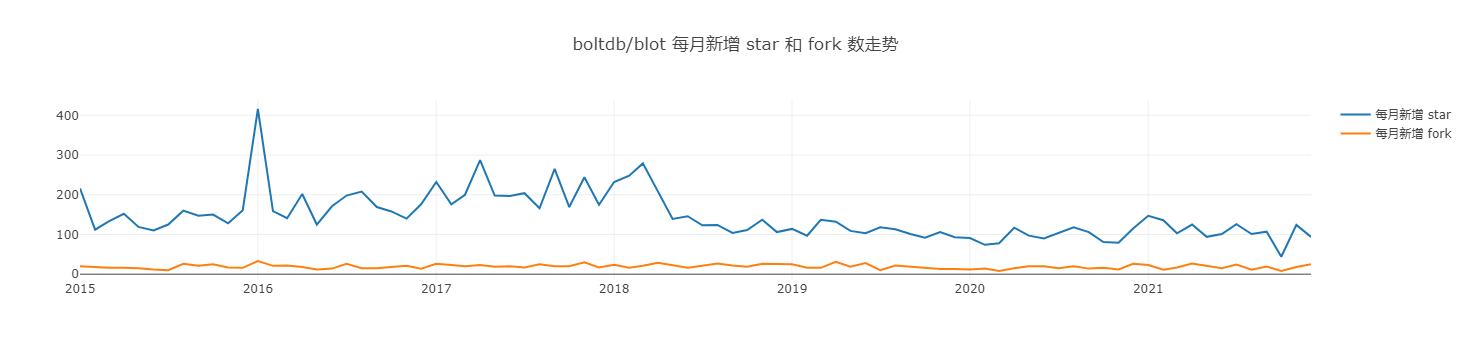

┌─────────┬───────────┬───────────┬───────────┐
│ (index) │ fork_date │ fork_data │ star_data │
├─────────┼───────────┼───────────┼───────────┤
│    0    │ '2015-1'  │   '20'    │   '216'   │
│    1    │ '2015-2'  │   '17'    │   '112'   │
│    2    │ '2015-3'  │   '16'    │   '133'   │
│    3    │ '2015-4'  │   '16'    │   '152'   │
│    4    │ '2015-5'  │   '15'    │   '119'   │
│    5    │ '2015-6'  │   '12'    │   '110'   │
│    6    │ '2015-7'  │   '10'    │   '125'   │
│    7    │ '2015-8'  │   '26'    │   '160'   │
│    8    │ '2015-9'  │   '21'    │   '147'   │
│    9    │ '2015-10' │   '25'    │   '150'   │
│   10    │ '2015-11' │   '17'    │   '128'   │
│   11    │ '2015-12' │   '16'    │   '161'   │
│   12    │ '2016-1'  │   '33'    │   '416'   │
│   13    │ '2016-2'  │   '21'    │   '159'   │
│   14    │ '2016-3'  │   '22'    │   '141'   │
│   15    │ '2016-4'  │   '18'    │   '202'   │
│   16    │ '2016-5'  │   '12'    │   '125'   │
│   17    │ '2016-6'  │   '14'    │   '1

In [7]:
console.log("任务1");
Promise.all(
  years.map((year) => {
    return query(`
    select toYear(created_at)*100+toMonth(created_at) as yearmonth, type, count(1) as cnt
    from github_log.year${year}
    where repo_id=${repo_id} and type in ('WatchEvent', 'ForkEvent')
    group by (yearmonth, type)
    order by yearmonth
    `);
  })    
).then(data => {
    var x_star = [], y_star = [], x_fork = [], y_fork = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
            year_month = Math.round(row[i].yearmonth/100) + '-' + (row[i].yearmonth%100);
            if (row[i].type == 'WatchEvent') {
                x_star.push(year_month);
                y_star.push(row[i].cnt);
            }
            if (row[i].type == 'ForkEvent') {
                x_fork.push(year_month);
                y_fork.push(row[i].cnt);
            }
        }
    });
    openDigger.render.plotly([{x:x_star, y:y_star, type: "scatter", name: "每月新增 star"}, 
                              {x:x_fork, y:y_fork, type: "scatter", name: "每月新增 fork"}], 
                             {title: 'boltdb/blot 每月新增 star 和 fork 数走势'});
    function Fork(fork_date,fork_data,star_data){
        this.fork_date = fork_date;
        this.fork_data = fork_data;
        this.star_data = star_data;
    }
    var fork = [];
    for(var i = 0; i < x_fork.length; i++){
        var tmp = new Fork(x_fork[i],y_fork[i],y_star[i]);
        fork.push(tmp);
    }
    console.table(fork);
});

任务2


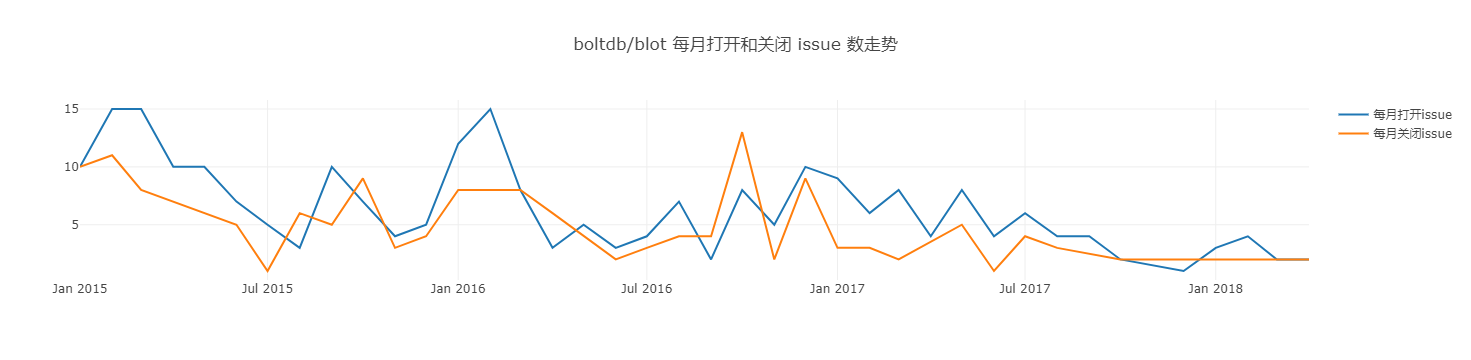

┌─────────┬────────────┬──────┬───────────┐
│ (index) │ issue_date │ open │   close   │
├─────────┼────────────┼──────┼───────────┤
│    0    │  '2015-1'  │ '10' │   '10'    │
│    1    │  '2015-2'  │ '15' │   '11'    │
│    2    │  '2015-3'  │ '15' │    '8'    │
│    3    │  '2015-4'  │ '10' │    '7'    │
│    4    │  '2015-5'  │ '10' │    '6'    │
│    5    │  '2015-6'  │ '7'  │    '5'    │
│    6    │  '2015-7'  │ '5'  │    '1'    │
│    7    │  '2015-8'  │ '3'  │    '6'    │
│    8    │  '2015-9'  │ '10' │    '5'    │
│    9    │ '2015-10'  │ '7'  │    '9'    │
│   10    │ '2015-11'  │ '4'  │    '3'    │
│   11    │ '2015-12'  │ '5'  │    '4'    │
│   12    │  '2016-1'  │ '12' │    '8'    │
│   13    │  '2016-2'  │ '15' │    '8'    │
│   14    │  '2016-3'  │ '8'  │    '8'    │
│   15    │  '2016-4'  │ '3'  │    '6'    │
│   16    │  '2016-5'  │ '5'  │    '4'    │
│   17    │  '2016-6'  │ '3'  │    '2'    │
│   18    │  '2016-7'  │ '4'  │    '3'    │
│   19    │  '2016-8'  │ '7'  │ 

In [8]:
console.log("任务2");
Promise.all(
    years.map(year => {
        return query(`
        select toYear(created_at)*100+toMonth(created_at) as yearmonth, action, count(1) as cnt
        from github_log.year${year}
        where repo_id=${repo_id} and type in ('IssuesEvent') and action in ('opened','closed')
        group by (yearmonth,action)
        order by yearmonth
        `);
    })
).then(data => {
    var x_opened = [], y_opened = [],x_closed = [], y_closed = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
            year_month = Math.round(row[i].yearmonth/100) + '-' + (row[i].yearmonth%100);
            if (row[i].action == 'opened') {
                x_opened.push(year_month);
                y_opened.push(row[i].cnt);
            }
            if (row[i].action == 'closed') {
                x_closed.push(year_month);
                y_closed.push(row[i].cnt);
            }
        }
    });
     openDigger.render.plotly([{x:x_opened, y:y_opened, type: "scatter", name: "每月打开issue"}, 
                              {x:x_closed, y:y_closed, type: "scatter", name: "每月关闭issue"}], 
                             {title: 'boltdb/blot 每月打开和关闭 issue 数走势'});
    function Issue(issue_date,open,close){
        this.issue_date = issue_date;
        this.open = open;
        this.close = close;
    }
    var issue = [];
    for(var i = 0; i < x_opened.length; i++){
        var tmp = new Issue(x_opened[i],y_opened[i],y_closed[i]);
        issue.push(tmp);
    }
    console.table(issue);
});

任务3.1


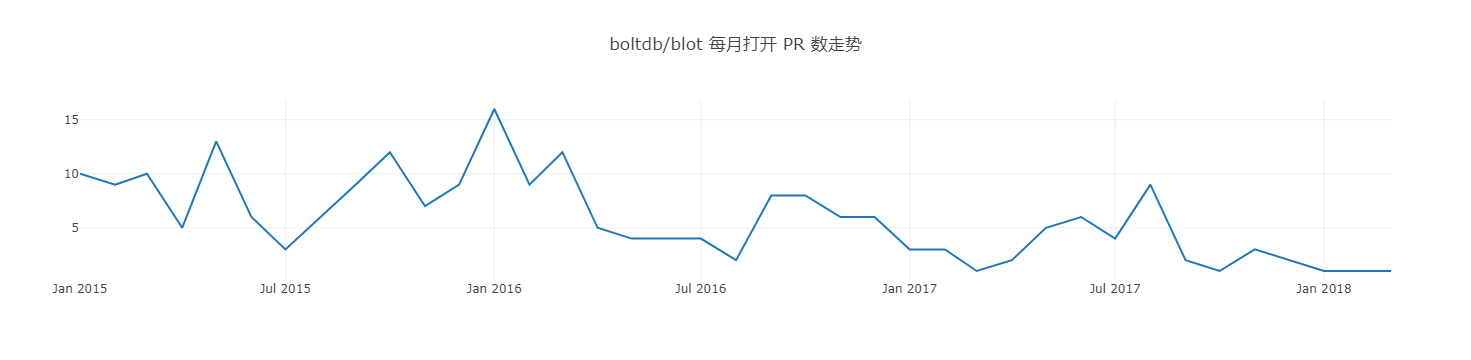

┌─────────┬───────────┬─────────┐
│ (index) │  pr_date  │ pr_open │
├─────────┼───────────┼─────────┤
│    0    │ '2015-1'  │  '10'   │
│    1    │ '2015-2'  │   '9'   │
│    2    │ '2015-3'  │  '10'   │
│    3    │ '2015-4'  │   '5'   │
│    4    │ '2015-5'  │  '13'   │
│    5    │ '2015-6'  │   '6'   │
│    6    │ '2015-7'  │   '3'   │
│    7    │ '2015-8'  │   '6'   │
│    8    │ '2015-9'  │   '9'   │
│    9    │ '2015-10' │  '12'   │
│   10    │ '2015-11' │   '7'   │
│   11    │ '2015-12' │   '9'   │
│   12    │ '2016-1'  │  '16'   │
│   13    │ '2016-2'  │   '9'   │
│   14    │ '2016-3'  │  '12'   │
│   15    │ '2016-4'  │   '5'   │
│   16    │ '2016-5'  │   '4'   │
│   17    │ '2016-6'  │   '4'   │
│   18    │ '2016-7'  │   '4'   │
│   19    │ '2016-8'  │   '2'   │
│   20    │ '2016-9'  │   '8'   │
│   21    │ '2016-10' │   '8'   │
│   22    │ '2016-11' │   '6'   │
│   23    │ '2016-12' │   '6'   │
│   24    │ '2017-1'  │   '3'   │
│   25    │ '2017-2'  │   '3'   │
│   26    │ '2

In [9]:
console.log("任务3.1");
Promise.all(
    years.map(year => {
        return query(`
        select toYear(created_at)*100+toMonth(created_at) as yearmonth, action, count(1) as cnt
        from github_log.year${year}
        where repo_id=${repo_id} and type in ('PullRequestEvent') and action = 'opened'
        group by (yearmonth,action)
        order by yearmonth
        `);
    })
).then(data => {
    var x_opened = [], y_opened = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
            year_month = Math.round(row[i].yearmonth/100) + '-' + (row[i].yearmonth%100);
                x_opened.push(year_month);
                y_opened.push(row[i].cnt);
        }
    });
     openDigger.render.plotly([{x:x_opened, y:y_opened, type: "scatter", name: "每月打开PR"}], 
                             {title: 'boltdb/blot 每月打开 PR 数走势'});
    function PR(pr_date,pr_open){
        this.pr_date = pr_date;
        this.pr_open = pr_open;

    }
    var pr = [];
    for(var i = 0; i < x_opened.length; i++){
        var tmp = new PR(x_opened[i],y_opened[i]);
        pr.push(tmp);
    }
    console.table(pr);
});

任务3.2


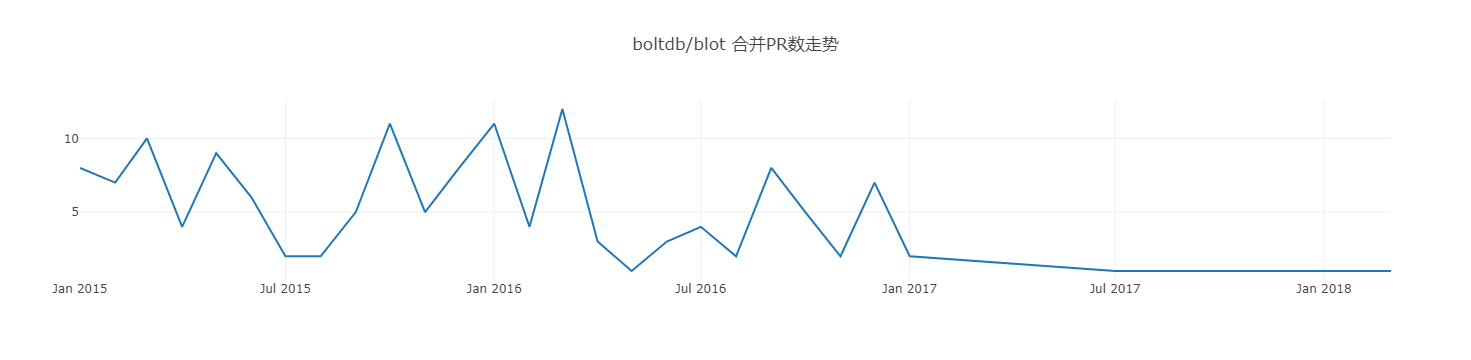

┌─────────┬────────────────┬───────────┐
│ (index) │ pr_merged_date │ pr_merged │
├─────────┼────────────────┼───────────┤
│    0    │    '2015-1'    │    '8'    │
│    1    │    '2015-2'    │    '7'    │
│    2    │    '2015-3'    │   '10'    │
│    3    │    '2015-4'    │    '4'    │
│    4    │    '2015-5'    │    '9'    │
│    5    │    '2015-6'    │    '6'    │
│    6    │    '2015-7'    │    '2'    │
│    7    │    '2015-8'    │    '2'    │
│    8    │    '2015-9'    │    '5'    │
│    9    │   '2015-10'    │   '11'    │
│   10    │   '2015-11'    │    '5'    │
│   11    │   '2015-12'    │    '8'    │
│   12    │    '2016-1'    │   '11'    │
│   13    │    '2016-2'    │    '4'    │
│   14    │    '2016-3'    │   '12'    │
│   15    │    '2016-4'    │    '3'    │
│   16    │    '2016-5'    │    '1'    │
│   17    │    '2016-6'    │    '3'    │
│   18    │    '2016-7'    │    '4'    │
│   19    │    '2016-8'    │    '2'    │
│   20    │    '2016-9'    │    '8'    │
│   21    │   '2

In [10]:
console.log("任务3.2");
Promise.all(
    years.map(year => {
        return query(`
        select toYear(created_at)*100+toMonth(created_at) as yearmonth, action, pull_merged, count(1) as cnt
        from github_log.year${year}
        where repo_id=${repo_id} and type in ('PullRequestEvent') and action = 'closed' and pull_merged = 1
        group by (yearmonth,action,pull_merged)
        order by yearmonth
        `);
    })
).then(data => {
    var x_merged = [], y_merged = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
            year_month = Math.round(row[i].yearmonth/100) + '-' + (row[i].yearmonth%100);
                x_merged.push(year_month);
                y_merged.push(row[i].cnt);
        }
    });
     openDigger.render.plotly([{x:x_merged, y:y_merged, type: "scatter", name: "每月合并PR"}], 
                             {title: 'boltdb/blot 合并PR数走势'});
    function PR_Merged(pr_merged_date,pr_merged){
        this.pr_merged_date = pr_merged_date;
        this.pr_merged = pr_merged;

    }
    var pr_merged = [];
    for(var i = 0; i < x_merged.length; i++){
        var tmp = new PR_Merged(x_merged[i],y_merged[i]);
        pr_merged.push(tmp);
    }
    console.table(pr_merged);
});

任务4


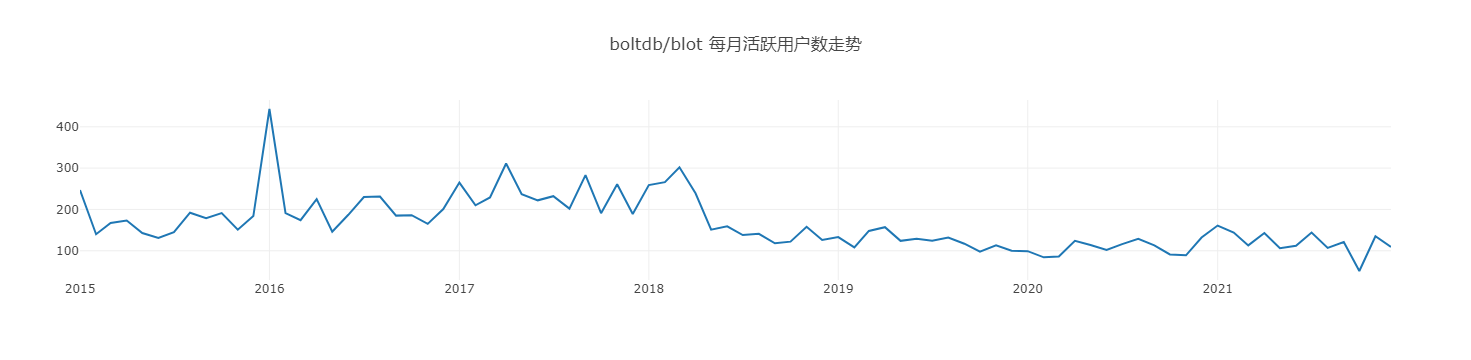

┌─────────┬────────────┬───────────┐
│ (index) │ actor_date │ actor_num │
├─────────┼────────────┼───────────┤
│    0    │  '2015-1'  │   '247'   │
│    1    │  '2015-2'  │   '140'   │
│    2    │  '2015-3'  │   '167'   │
│    3    │  '2015-4'  │   '173'   │
│    4    │  '2015-5'  │   '143'   │
│    5    │  '2015-6'  │   '131'   │
│    6    │  '2015-7'  │   '145'   │
│    7    │  '2015-8'  │   '192'   │
│    8    │  '2015-9'  │   '179'   │
│    9    │ '2015-10'  │   '191'   │
│   10    │ '2015-11'  │   '151'   │
│   11    │ '2015-12'  │   '184'   │
│   12    │  '2016-1'  │   '443'   │
│   13    │  '2016-2'  │   '191'   │
│   14    │  '2016-3'  │   '174'   │
│   15    │  '2016-4'  │   '225'   │
│   16    │  '2016-5'  │   '146'   │
│   17    │  '2016-6'  │   '187'   │
│   18    │  '2016-7'  │   '230'   │
│   19    │  '2016-8'  │   '231'   │
│   20    │  '2016-9'  │   '185'   │
│   21    │ '2016-10'  │   '186'   │
│   22    │ '2016-11'  │   '165'   │
│   23    │ '2016-12'  │   '201'   │
│

In [11]:
console.log("任务4");
Promise.all(
    years.map(year => {
        return query(`
        select toYear(created_at)*100+toMonth(created_at) as yearmonth, count(distinct(actor_id)) as cnt
        from github_log.year${year}
        where repo_id=${repo_id}
        group by (yearmonth)
        order by yearmonth
        `);
    })
).then(data => {
    var x_actor = [], y_actor = []
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
            year_month = Math.round(row[i].yearmonth/100) + '-' + (row[i].yearmonth%100);
                x_actor.push(year_month);
                y_actor.push(row[i].cnt);
        }
    });
     openDigger.render.plotly([{x:x_actor, y:y_actor, type: "scatter", name: "每月活跃用户数"}], 
                             {title: 'boltdb/blot 每月活跃用户数走势'});
    function Actor(actor_date,actor_num){
        this.actor_date = actor_date;
        this.actor_num = actor_num;
    }
    var actor = [];
    for(var i = 0; i < x_actor.length; i++){
        var tmp = new Actor(x_actor[i],y_actor[i]);
        actor.push(tmp);
    }
    console.table(actor);
});

In [12]:
console.log("任务5");
Promise.all(
    years.map(year => {
        return query(`
        select issue_id, minus(issue_closed_at,issue_created_at) as time, count(issue_id) as cnt
        from github_log.year${year}
        where repo_id=${repo_id} and type = 'IssuesEvent' and issue_closed_at > issue_created_at
        group by (issue_id, time)
        order by issue_id
        `);
    })
).then(data => {
    var time = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
                time.push(row[i].time);
        }
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("Issue 从打开到关闭的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("Issue 从打开到关闭的中位数"+mid_time+"天");
});

任务5
Issue 从打开到关闭的平均时长38.80528694337401天
Issue 从打开到关闭的中位数1.3300810185185183天


In [13]:
console.log("任务6");
Promise.all(
    years.map(year => {
        return query(`
        select minus(pull_merged_at, created_at) as time from 
        (select issue_id, created_at
        from github_log.year${year}
        where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened'
        group by (issue_id, created_at)
        order by issue_id) ta,
        (select issue_id, pull_merged_at
        from github_log.year${year}
        where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'closed' and pull_merged = 1
        group by (issue_id, pull_merged_at)
        order by issue_id) tb where ta.issue_id = tb.issue_id
        `);
    })
).then(data => {
    var time = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
                time.push(row[i].time);
        }
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("PR 从打开到关闭的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("PR 从打开到关闭的中位数"+mid_time+"天");
});

任务6
PR 从打开到关闭的平均时长6.452296883150757天
PR 从打开到关闭的中位数0.5787962962962964天


In [14]:
console.log("任务7.1");
console.log("Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）");
Promise.all(
    years.map(year => {
        return query(`
        select distinct(issue_id), minus(issue_updated_at, issue_created_at) as time
        from github_log.year${year}
        where repo_id=${repo_id} and type in ('IssuesEvent') and not actor_id = issue_author_id and issue_updated_at > issue_created_at
        order by (issue_id, time)
        `);
    })
).then(data => {
    var time = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
                time.push(row[i].time);
        }
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("Issue从打开到第一次有人回复（非本人回复）的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("Issue从打开到第一次有人回复（非本人回复）的中位数"+mid_time+"天");
});

任务7.1
Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
Issue从打开到第一次有人回复（非本人回复）的平均时长40.53214962962963天
Issue从打开到第一次有人回复（非本人回复）的中位数1.6237615740740743天


In [15]:
console.log("任务7.2");
console.log("PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）");
Promise.all(
    years.map(year => {
        return query(`
        select distinct(issue_id), minus(issue_updated_at, issue_created_at) as time
        from github_log.year${year}
        where repo_id=${repo_id} and type in ('PullRequestEvent') and not actor_id = issue_author_id and issue_updated_at > issue_created_at
        order by (issue_id, time)
        `);
    })
).then(data => {
    var time = [];
    data.map((row) => {
        for (var i = 0; i < row.length; i++) {
                time.push(row[i].time);
        }
    });
    var avg_time = 0;
    for (var i = 0; i < time.length; i++){
        avg_time += time[i];
    }
    var avg_time = avg_time/time.length/(60*60*24);
    console.log("PR从打开到第一次有人回复（非本人回复）的平均时长"+avg_time+"天");
    time.sort(function(a, b){return a-b}); 
    var mid_time = time[parseInt(time.length/2)]/60/60/24;
    console.log("PR从打开到第一次有人回复（非本人回复）的中位数"+mid_time+"天");
});

任务7.2
PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
PR从打开到第一次有人回复（非本人回复）的平均时长123.52784150752315天
PR从打开到第一次有人回复（非本人回复）的中位数3.3102546296296294天


In [16]:
console.log("任务8");
console.log("2015年7月，日活跃用户数，合并PR数，每月打开和关闭issue数都达到了一个较低的位置");
console.log("2016年1月，日活跃用户数达到历史最高，每月打开issue数和每月新增star数都达到了历史最高");
console.log("2017年1月，合并PR数达到了历史最低位，并且之后没有显著增长；每月PR总数也呈现下降趋势");
console.log("2018年3月-5月，日活跃用户数急剧下降");

任务8
2015年7月，日活跃用户数，合并PR数，每月打开和关闭issue数都达到了一个较低的位置
2016年1月，日活跃用户数达到历史最高，每月打开issue数和每月新增star数都达到了历史最高
2017年1月，合并PR数达到了历史最低位，并且之后没有显著增长；每月PR总数也呈现下降趋势
2018年3月-5月，日活跃用户数急剧下降
